In [1]:
from matplotlib.ticker import MaxNLocator

In [2]:
import numpy as np
from hmmlearn import hmm
import csv
import matplotlib.pyplot as plt
import sys
from BW import *
import sys
sys.setrecursionlimit(1000000)
import datetime
from matplotlib.lines import Line2D

In [3]:
states = ["H1","H2"]
n_states = len(states)

observations = ["V1", "V2"]
n_observations = len(observations)

start_probability = np.array([0.6,0.4])

transition_probability=np.array([[0.7, 0.3],
       [0.4, 0.6]])

emission_probability = np.array([[0.6, 0.4],
       [0.6, 0.4]])
model = hmm.MultinomialHMM(n_components=n_states,n_iter=1000,tol=1e-15,init_params=" ",params="te")
model.startprob_=start_probability
model.transmat_=transition_probability
model.emissionprob_=emission_probability

In [4]:
np.random.seed(77)

In [5]:
X=np.array([[1],[0],[1],[0],[1]])

In [6]:
for i in range(len(X.T[0])):
    print('v_'+repr(X.T[0][i]),end=',')
    if (i+1)%25==0:
        print(" \\\ ")

v_1,v_0,v_1,v_0,v_1,

In [7]:
model.score(X.T.reshape(-1,1))

-3.7705234431544463

In [8]:
#Starting from Uniform
tA=np.array([[0.7,0.3],[0.4,0.6]])
tB=np.array([[0.6,0.4],[0.6,0.4]])

In [9]:
tA,tB

(array([[0.7, 0.3],
        [0.4, 0.6]]),
 array([[0.6, 0.4],
        [0.6, 0.4]]))

In [10]:
model.transmat_=tA
model.emissionprob_=tB

In [11]:
model.score(X.T.reshape(-1,1))

-3.7705234431544463

In [12]:
model=model.fit(X)

In [13]:
model.monitor_

ConvergenceMonitor(
    history=[-3.7705234431544463, -3.3649261655669416, -3.364872088275898, -3.364840449592649, -3.3648140823654917, -3.364787569058241, -3.364759063232826, -3.364727786572473, -3.3646932609033837, -3.3646550698899, -3.364612781862429, -3.3645659210429946, -3.3645139525576844, -3.3644562704391303, -3.3643921850322904, -3.3643209083376133, -3.3642415363663964, -3.3641530276063296, -3.364054176511628, -3.3639435806178053, -3.363819599431653, -3.3636803026208306, -3.3635234041523994, -3.3633461777941607, -3.363145347626407, -3.362916944652138, -3.362656116828667, -3.362356874215843, -3.362011742376445, -3.361611283896349, -3.3611434268967866, -3.360592505427726, -3.359937860240032, -3.359151752253358, -3.3581961719168802, -3.3570178200161855, -3.355539954147148, -3.3536486484740298, -3.3511686403793233, -3.3478187430465356, -3.343124696036181, -3.3362369972033425, -3.325518820279915, -3.3075241652203498, -3.2741941198064866, -3.2044573013640605, -3.0398199382149294, -2.

In [14]:
np.round(model.transmat_,3)

array([[0., 1.],
       [1., 0.]])

In [15]:
np.round(model.emissionprob_,3)

array([[0., 1.],
       [1., 0.]])

In [16]:
model.monitor_.converged

True

-3.3648720882758987
[[0.699 0.301]
 [0.399 0.601]]
[[0.395 0.605]
 [0.407 0.593]]
-3.3648404495926476


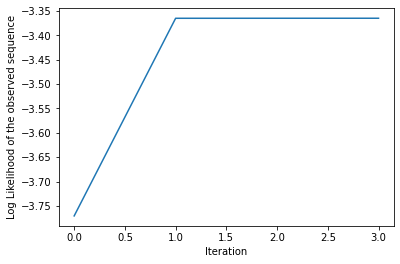

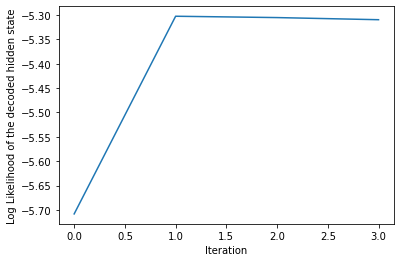

In [17]:
L1=BW(np.copy(start_probability),np.copy(tA),np.copy(tB),X,4)

[[0.7 0.3]
 [0.4 0.6]]
[[0.6 0.4]
 [0.6 0.4]]
-3.7705234431544463


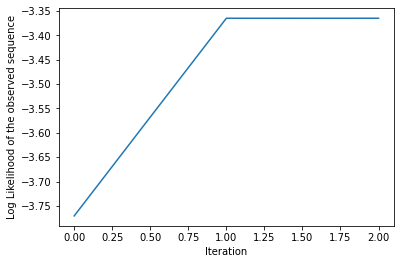

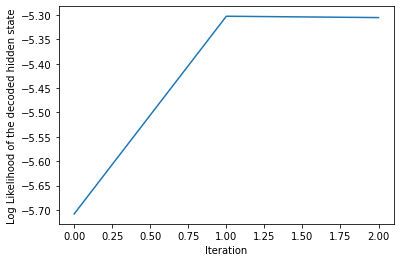

In [18]:
L1=BWlib(np.copy(start_probability),np.copy(tA),np.copy(tB),X,3)

In [19]:
np.round(model.transmat_,3)

array([[0., 1.],
       [1., 0.]])

In [20]:
np.round(model.emissionprob_,3)

array([[0., 1.],
       [1., 0.]])

In [21]:
transition_probability

array([[0.7, 0.3],
       [0.4, 0.6]])

In [30]:
from crnsimulator import ReactionGraph
from IPython.display import Image
import numpy as np
from HMMCRN import *
import crnsimulator

In [31]:
R=HMMCRN(['H1','H2'],['V1','V2'])
ob=X
R.Ob=ob
Tr=R.EM()
RG=ReactionGraph(Tr)

In [29]:
pip show crnsimulator

Name: crnsimulator
Version: 0.8
Summary: Simulate CRNs using ODEs.
Home-page: https://github.com/bad-ants-fleet/crnsimulator
Author: Stefan Badelt
Author-email: badelt@caltech.edu
License: MIT
Location: /home/geek/anaconda3/lib/python3.8/site-packages
Requires: scipy, sympy, matplotlib, seaborn, networkx, pyparsing, numpy
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [32]:
%%time
filename,odename=RG.write_ODE_lib(filename='1-100-AB.py')

CPU times: user 958 ms, sys: 1.19 ms, total: 959 ms
Wall time: 961 ms


In [33]:
theta0=np.array([0.6,0.4])
n=2
m=2
l=len(ob)
I=BW_init(theta0,tA,tB,X.T[0])
#I=uni_init(n,m,X.T[0])
start=init_simulator(n,m,l,I,'1-100-AB.py')

In [27]:
X

array([[1],
       [0],
       [1],
       [0],
       [1]])

In [34]:
!python 1-100-AB.py --a 1e-3 --r 1e-3 --t8 15500 --t-lin 1000 --nxy>100.dat

WARNING - Specify a vector of initial concentrations: e.g. --p0 1=0.1 2=0.005 3=1e-6 (see --help)
Initial concentrations can be overwritten by --p0 argument


In [35]:
Final=!tail -n 2 100.dat
Init=!head -n 2 100.dat
Y1=Init[1].split()[1:]
Y2=Final[0].split()[1:]
print_conc(start,Y1,Y2)
!sed '1d;$d' 100.dat>100.csv
t1,c1L,c1T01,c1T02,c1T11,c1T12,c1T21,c1T22,c1T1_1,c1T1_2,c1T2_1,c1T2_2=crn_Liklihood('100.csv',start,ob)

ValueError: could not convert string to float: 'A1_1'

In [30]:
#Image(filename='o100.png')
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

In [ ]:
#Plotting BW and CRN Likelihood Trajectories
fig, ax1 = plt.subplots()
#ax1.set_facecolor('white')
ax1.grid(True)
ax1.set_ylabel(r'Log Likelihood of $V_1$')
ax1.plot(np.linspace(0,2,3),L1, label=r'Baum-Welch Algorithm')
ax1.set_xlabel('Iteration')
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
fig.tight_layout()
ax1.legend()
#ax1.set_rasterized(True)
#plt.savefig('/home/abhinav/GitLab/hmm-crn/PNAS/Example1/PLOTS/1-100uni_initBW.pdf', format='pdf', dpi=1000)
plt.show()

In [ ]:
#Plotting BW and CRN Likelihood Trajectories
fig, ax1 = plt.subplots()
#ax1.set_facecolor('white')
ax1.grid(True)
ax1.set_ylabel(r'Log Likelihood of $V_1$')
ax1.plot(t1[:10],c1L[:10], label=r'Net3')
ax1.set_xlabel('Time')
fig.tight_layout()
ax1.legend(loc='lower right')
#ax1.set_rasterized(True)
#plt.savefig('/home/abhinav/GitLab/hmm-crn/PNAS/Example1/PLOTS/1-100uni_initNet3.pdf', format='pdf', dpi=1000)
plt.show()

In [ ]:
#Plotting BW and CRN Likelihood Trajectories
fig, ax1 = plt.subplots()
ax2 = ax1.twiny()
#ax1.set_facecolor('white')
ax1.grid(True)
ax2.grid(False)
ax1.set_ylabel(r'Log Likelihood of $V_1$')
ax1.plot(np.linspace(0,2,3),L1, label=r'Baum-Welch Algorithm')
ax2.plot(t1[:10],c1L[:10],'--',linewidth=3, label=r'Net 3')
ax1.set_xlabel('Iteration')
ax2.set_xlabel('Time')
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
fig.tight_layout()
ax1.legend(loc='best')
ax2.legend(loc='best')
#ax1.set_rasterized(True)
#plt.savefig('/home/abhinav/GitLab/hmm-crn/PNAS/Example1/PLOTS/1-100uni_init-mix.pdf', format='pdf', dpi=1000)
plt.show()

In [ ]:
import numpy as np
from hmmlearn import hmm
hidden_states = ["H1","H2"]
n_hidden_states = len(hidden_states)

pi = np.array([0.6,0.4]) 
theta,psi=np.array([[ 0.122,0.878],[1.,0.]]),np.array([[0. ,1.],[ 1. ,0.]])
#theta=np.array([[0.270,0.730],[0.515,0.485]])
#psi=np.array([[0.379, 0.621],[0.475,0.525]])

model = hmm.MultinomialHMM(n_components=n_hidden_states,n_iter=1000,tol=1e-15,init_params=" ",params="te")
model.startprob_=np.copy(pi)
model.transmat_=np.copy(theta)
model.emissionprob_=np.copy(psi)
print("Start BW:\n",np.round(model.transmat_,3))
print(np.round(model.emissionprob_,3))
#X=np.array([[1,0,1,1,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,1,1,1,1,0,0,1,1,0,0,0,1,0,1,1,1,1,0,0,0,1,1,1,0,1,0,1,0,0,1,1,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,1]]).T
X=np.array([[1,0,1,0,1]])
print(model.score(X))

model=model.fit(X)
model.monitor_

print("END BW:\n",np.round(model.transmat_,3))
print(np.round(model.emissionprob_,3))

print(model.score(X))